VAMSHIKRISHNA M
191CS261

In [ ]:
# Import the libraries we need for this lab

# Using the following line code to install the torchvision library
# !conda install -y torchvision

#install required libraries
import pandas as pd
import numpy as np
#data visualization packages
import matplotlib.pyplot as plt
#keras packages
#importing required libraries..
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
#model evaluation packages
from sklearn.metrics import f1_score, roc_auc_score, log_loss
from sklearn.model_selection import cross_val_score, cross_validate

#importing required libraries..
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt


#loading the dataset

In [ ]:
#loading the dataset...
cifar=tf.keras.datasets.cifar10
(training_images,training_labels),(testing_images,testing_labels)=cifar.load_data()

In [ ]:
#checking the shape of images ...
training_images.shape

(50000, 32, 32, 3)

In [ ]:
#checking shape of labels...
training_labels.shape


(50000, 1)

In [ ]:
#reshaping training and testing images to a single 4D list..
training_images=training_images.reshape(50000,32,32,3)
testing_images=testing_images.reshape(10000,32,32,3)

In [ ]:
#dividing image pixel by 255 so that pixel comes in range 0 to 1...
training_images=training_images/255.0
testing_images=testing_images/255.0

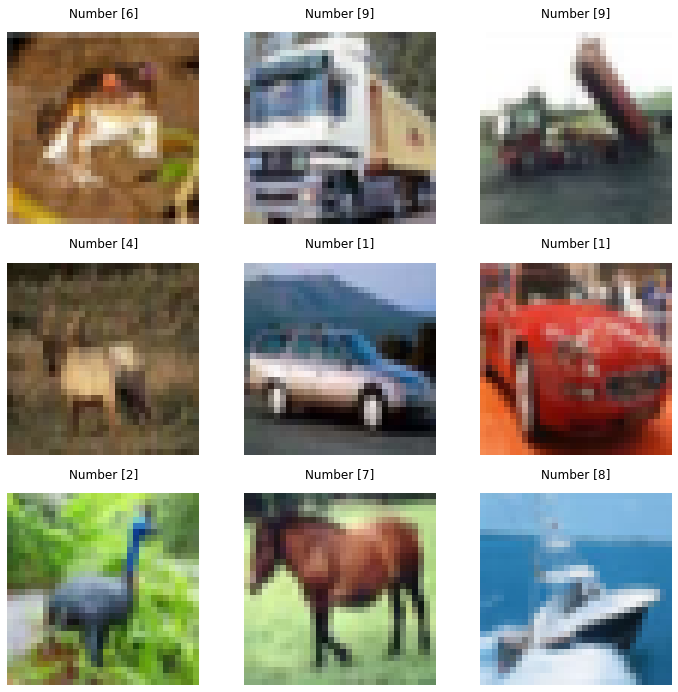

In [ ]:
# create figure with 3x3 subplots using matplotlib.pyplot
fig, axs = plt.subplots(3, 3, figsize = (12, 12))
plt.gray()

# loop through subplots and add mnist images
for i, ax in enumerate(axs.flat):
    ax.matshow(training_images[i])
    ax.axis('off')
    ax.set_title('Number {}'.format(training_labels[i]))
    
# display the figure
fig.show()

#creating the model

In [ ]:
#defining the model...
model=tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(32, 32, 3)),
  tf.keras.layers.MaxPooling2D(2, 2),
  tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
  tf.keras.layers.MaxPooling2D(2,2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

#compiling and training the model..

In [ ]:
#compiling the model...
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
#training data to the model...
model.fit(training_images,training_labels,epochs=10)

Epoch 1/10
1563/1563 [==============================] - 13s 8ms/step - loss: 0.3591 - accuracy: 0.8730
Epoch 2/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.3064 - accuracy: 0.8915
Epoch 3/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2770 - accuracy: 0.9013
Epoch 4/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2304 - accuracy: 0.9173
Epoch 5/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.2091 - accuracy: 0.9259
Epoch 6/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1849 - accuracy: 0.9344
Epoch 7/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1608 - accuracy: 0.9425
Epoch 8/10
1563/1563 [==============================] - 12s 8ms/step - loss: 0.1506 - accuracy: 0.9464
Epoch 9/10
1563/1563 [==============================] - 13s 9ms/step - loss: 0.1380 - accuracy: 0.9510
Epoch 10/10
1563/1563 [==============================] - 12s 8ms/step - l

evaluating the model for testing data

In [ ]:
#evaluating the model for testing data..
test_loss,test_acc=model.evaluate(testing_images,testing_labels)

313/313 [==============================] - 2s 5ms/step - loss: 1.9697 - accuracy: 0.6868


In [ ]:
print("Test accuracy:",test_acc*100)


Test accuracy: 68.68000030517578


In [ ]:
#predicting the data...
predictions=model.predict(testing_images)

#confusion matrix

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
#y_pred= np.asarray(np.where(predictions == np.argmax(predictions)))
y_pred=predictions.argmax(axis=1);
y_pred=y_pred.reshape(y_pred.shape[0],1)

In [ ]:
predictions.shape

(10000, 10)

In [ ]:
y_pred.shape

(10000, 1)

In [ ]:
(confusion_matrix(y_pred,testing_labels))


array([[714,  17,  78,  34,  19,  11,  13,  18,  44,  26],
       [ 21, 773,   9,  13,   9,  11,  16,   5,  32,  62],
       [ 63,   7, 562,  73,  79,  80,  56,  34,  11,   8],
       [ 18,   7,  55, 461,  65, 171,  62,  25,  14,  11],
       [ 18,   5,  82,  74, 613,  49,  34,  64,   6,   6],
       [ 10,   4,  66, 175,  33, 551,  19,  48,   7,   5],
       [  8,   7,  68,  75,  55,  22, 762,   7,   3,   4],
       [ 17,   5,  37,  42,  94,  68,  12, 760,   4,  13],
       [ 87,  50,  20,  29,  18,  15,  10,  10, 843,  36],
       [ 44, 125,  23,  24,  15,  22,  16,  29,  36, 829]])

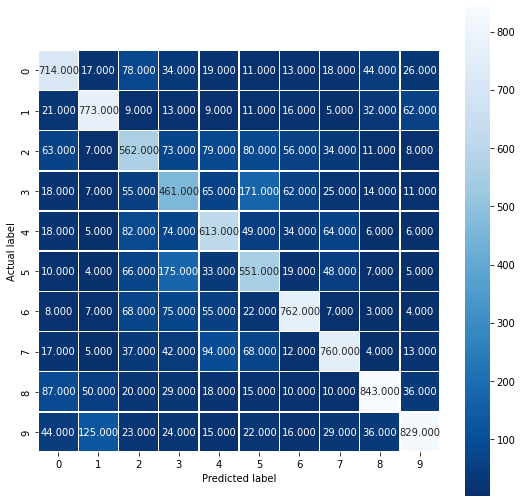

In [ ]:
from sklearn.metrics import confusion_matrix, classification_report
import seaborn as sns
cm = confusion_matrix(y_pred,testing_labels)
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".3f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');

#classification report

In [ ]:
print(classification_report(y_pred,testing_labels))

              precision    recall  f1-score   support

           0       0.71      0.73      0.72       974
           1       0.77      0.81      0.79       951
           2       0.56      0.58      0.57       973
           3       0.46      0.52      0.49       889
           4       0.61      0.64      0.63       951
           5       0.55      0.60      0.57       918
           6       0.76      0.75      0.76      1011
           7       0.76      0.72      0.74      1052
           8       0.84      0.75      0.80      1118
           9       0.83      0.71      0.77      1163

    accuracy                           0.69     10000
   macro avg       0.69      0.68      0.68     10000
weighted avg       0.70      0.69      0.69     10000

